In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import gfile
import imageio
import pickle
import scipy.misc
import sys

from IPython.display import HTML
from nets import inception_v3
import scipy.misc
slim = tf.contrib.slim

%matplotlib inline

In [2]:
tf.reset_default_graph()
batch_size = 25
idims = (299, 299)
image = tf.placeholder(tf.uint8, (batch_size, ) + idims + (3, ), name='image')
image_trans = tf.image.convert_image_dtype(image, dtype=tf.float32)
image_trans = tf.subtract(image_trans, 0.5)
image_trans = tf.multiply(image_trans, 2.0)
with slim.arg_scope(inception_v3.inception_v3_arg_scope()):
    model = inception_v3.inception_v3(image_trans, num_classes=1001, is_training=False, dropout_keep_prob=1.0)

In [3]:
variables_to_restore = slim.get_variables_to_restore()
restorer = tf.train.Saver(variables_to_restore)
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
# sess.run(tf.global_variables_initializer())
restorer.restore(sess, "./inception/inception_v3.ckpt")

INFO:tensorflow:Restoring parameters from ./inception/inception_v3.ckpt


dtype('uint8')

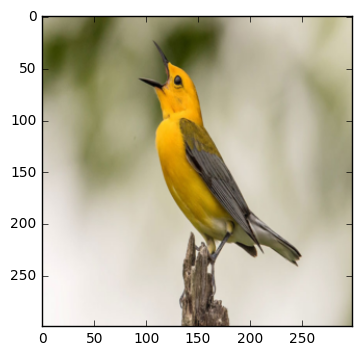

In [4]:
bird = scipy.misc.imread('inception/bird.jpg')
bird = scipy.misc.imresize(bird, idims)
plt.imshow(bird)
bird.dtype

(25, 1001)


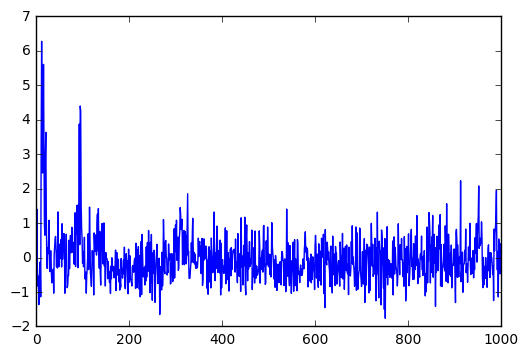

In [5]:
logits = sess.run(model[0], {image:[bird]*batch_size})
print(logits.shape)
plt.plot(logits[0])

In [6]:
np.argsort(logits[0])[-20:]

array([ 88,  97,  91, 883, 326, 990, 952, 913,  14,  15,  20,  11,  17,
        13,  21,  93,  96,  95,  16,  12])

In [7]:
def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))
def writevids(filename, videos):
    nfail = 0
    writer = tf.python_io.TFRecordWriter(filename)
    for idx, name in enumerate(videos):
        try:
            vid = imageio.get_reader(name,  'ffmpeg')
            if idx % 100 == 0:
                print(idx)
            if len(vid) == 51:
                frames = []
                for j in range(1, 51, 2):
                    frame = scipy.misc.imresize(vid.get_data(j), idims)
                    if np.max(frame) == 0:
                        print("rip", itr, name)
                        frames = []
                        break
                    frames.append(frame)
                if len(frames) != 25:
                    continue
                layersout = sess.run(layers, {image:frames})
                example = tf.train.Example(features=tf.train.Features(feature={
                    layernames[i]:_float_feature(v) for i, v in enumerate(layersout)}))
                writer.write(example.SerializeToString())
        except:
            nfail += 1
            print("Unexpected error:", sys.exc_info())
            print(name)
            if nfail > 10:
                break
    writer.close()

In [24]:
videos = gfile.Glob("/home/andrewliu/research/viewpoint/rllab/data/push_start_goal_distract2/*.mp4")
writevids('inception_push_distract', videos)

0
100
200
Unexpected error: (<type 'exceptions.KeyboardInterrupt'>, KeyboardInterrupt(), <traceback object at 0x7ff95476f248>)
/home/andrewliu/research/viewpoint/rllab/data/push_start_goal_distract2/openaigym.video.4150.16863.video000000.mp4
Unexpected error: (<type 'exceptions.KeyboardInterrupt'>, KeyboardInterrupt(), <traceback object at 0x7ff9447addd0>)
/home/andrewliu/research/viewpoint/rllab/data/push_start_goal_distract2/openaigym.video.1897.16863.video000000.mp4
Unexpected error: (<type 'exceptions.KeyboardInterrupt'>, KeyboardInterrupt(), <traceback object at 0x7ff9546a8a28>)
/home/andrewliu/research/viewpoint/rllab/data/push_start_goal_distract2/openaigym.video.2625.16863.video000000.mp4
Unexpected error: (<type 'exceptions.KeyboardInterrupt'>, KeyboardInterrupt(), <traceback object at 0x7ff9546a8758>)
/home/andrewliu/research/viewpoint/rllab/data/push_start_goal_distract2/openaigym.video.3223.16863.video000000.mp4
Unexpected error: (<type 'exceptions.KeyboardInterrupt'>, Keyb

In [7]:
model[1].keys()

['Conv2d_2b_3x3',
 'Conv2d_3b_1x1',
 'Predictions',
 'Mixed_7a',
 'Mixed_7c',
 'Mixed_7b',
 'Mixed_5d',
 'Mixed_5c',
 'Mixed_5b',
 'AuxLogits',
 'MaxPool_3a_3x3',
 'MaxPool_5a_3x3',
 'Conv2d_2a_3x3',
 'PreLogits',
 'Mixed_6b',
 'Mixed_6c',
 'Mixed_6a',
 'Mixed_6d',
 'Mixed_6e',
 'Conv2d_1a_3x3',
 'Logits',
 'Conv2d_4a_3x3']

In [8]:
layernames = [s for s in model[1].keys() if s.startswith('Mixed_7') or s.startswith('Mixed_6') or s.startswith('Mixed_5')]
layers = [model[1][s] for s in layernames]
layers

[<tf.Tensor 'InceptionV3/InceptionV3/Mixed_7a/concat:0' shape=(25, 8, 8, 1280) dtype=float32>,
 <tf.Tensor 'InceptionV3/InceptionV3/Mixed_7c/concat:0' shape=(25, 8, 8, 2048) dtype=float32>,
 <tf.Tensor 'InceptionV3/InceptionV3/Mixed_7b/concat:0' shape=(25, 8, 8, 2048) dtype=float32>,
 <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5d/concat:0' shape=(25, 35, 35, 288) dtype=float32>,
 <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5c/concat:0' shape=(25, 35, 35, 288) dtype=float32>,
 <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5b/concat:0' shape=(25, 35, 35, 256) dtype=float32>,
 <tf.Tensor 'InceptionV3/InceptionV3/Mixed_6b/concat:0' shape=(25, 17, 17, 768) dtype=float32>,
 <tf.Tensor 'InceptionV3/InceptionV3/Mixed_6c/concat:0' shape=(25, 17, 17, 768) dtype=float32>,
 <tf.Tensor 'InceptionV3/InceptionV3/Mixed_6a/concat:0' shape=(25, 17, 17, 768) dtype=float32>,
 <tf.Tensor 'InceptionV3/InceptionV3/Mixed_6d/concat:0' shape=(25, 17, 17, 768) dtype=float32>,
 <tf.Tensor 'InceptionV3/InceptionV3/Mixed_

In [12]:
videos = gfile.Glob("/home/andrewliu/research/viewpoint/data4-30prongpush/*.MOV")
# videos = pickle.load(open('videolist.pkl', 'rb'))
idata = {}
nfail = 0
total = 0
itr = 0
np.random.shuffle(videos)
for name in videos:
    try:
        vid = imageio.get_reader(name,  'ffmpeg')
        nlen = len(vid)
        if itr % 50 == 0:
            print(itr, total)
        frames = []
        for j in range(25):
            frame = scipy.misc.imresize(vid.get_data(j * nlen // 25), idims)
            if np.max(frame) == 0:
                print("rip", itr, name)
                frames = []
                break
            frames.append(frame)
#         if len(frames) != 25:
#             continue
        layersout = sess.run(layers, {image:frames})
        total += 1
        for i, v in enumerate(layersout):
            if layernames[i] in idata:
                idata[layernames[i]] += v
            else:
                idata[layernames[i]] = v
        itr += 1
    except:
        nfail += 1
        print("Unexpected error:", sys.exc_info())
        print(name)
        if nfail > 1:
            break

0 0
50 50
100 100
150 150


In [28]:
allmeans = {key: v/total for key, v in idata.iteritems()}

In [35]:
videos = gfile.Glob("/home/andrewliu/research/viewpoint/data4-30prongpush/*.MOV")
# videos = pickle.load(open('videolist.pkl', 'rb'))
idata = {}
nfail = 0
total = 0
itr = 0
np.random.shuffle(videos)
for name in videos:
    try:
        vid = imageio.get_reader(name,  'ffmpeg')
        nlen = len(vid)
        if itr % 50 == 0:
            print(itr, total)
        frames = []
        for j in range(25):
            frame = scipy.misc.imresize(vid.get_data(j * nlen // 25), idims)
            if np.max(frame) == 0:
                print("rip", itr, name)
                frames = []
                break
            frames.append(frame)
#         if len(frames) != 25:
#             continue
        layersout = sess.run(layers, {image:frames})
        total += 1
        for i, v in enumerate(layersout):
            name = layernames[i]
            stds = (v-allmeans[name])**2
            if name in idata:
                idata[name] += stds
            else:
                idata[name] = stds
        itr += 1
    except:
        nfail += 1
        print("Unexpected error:", sys.exc_info())
        print(name)
        if nfail > 1:
            break

0 0
50 50
100 100
150 150


In [42]:
allstds = {key+"std": np.sqrt(v/total) for key, v in idata.iteritems()}

In [44]:
allkeys = allmeans.copy()
allkeys.update(allstds)

In [45]:
np.savez('real_inception', **allkeys)

In [56]:
videos = gfile.Glob("/home/andrewliu/research/viewpoint/rllab/data/push_distract/*.mp4")
# videos = pickle.load(open('videolist.pkl', 'rb'))
idata = {}
nfail = 0
total = 0
itr = 0
np.random.shuffle(videos)
for name in videos[:5000]:
    try:
        vid = imageio.get_reader(name,  'ffmpeg')
        nlen = len(vid)
        if itr % 50 == 0:
            print(itr, total)
        frames = []
        for j in range(1, 51, 2):
            frame = scipy.misc.imresize(vid.get_data(j), idims)
            if np.max(frame) == 0:
                print("rip", itr, name)
                frames = []
                break
            frames.append(frame)
        if len(frames) != 25:
            print("rip2", itr, name)
            continue
        layersout = sess.run(layers, {image:frames})
        total += 1
        for i, v in enumerate(layersout):
            if layernames[i] in idata:
                idata[layernames[i]] += v
            else:
                idata[layernames[i]] = v
        itr += 1
    except:
        nfail += 1
        print("Unexpected error:", sys.exc_info())
        print(name)
        if nfail > 10:
            break


0 0
rip 15 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.12612.31202.video000000.mp4
rip2 15 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.12612.31202.video000000.mp4
rip 30 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.12128.31202.video000000.mp4
rip2 30 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.12128.31202.video000000.mp4
rip 40 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.3348.10173.video000000.mp4
rip2 40 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.3348.10173.video000000.mp4
50 50
rip 60 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.13080.31202.video000000.mp4
rip2 60 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.13080.31202.video000000.mp4
rip 77 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.13668.31202.video

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Unexpected error: (<type 'exceptions.KeyboardInterrupt'>, KeyboardInterrupt(), <traceback object at 0x7f63957221b8>)
/home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.14256.31202.video000000.mp4
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/lib/python2.7/inspect.py", line 1048, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/usr/lib/python2.7/inspect.py", line 1008, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
 

IndexError: string index out of range

In [57]:
allmeans = {key: v/total for key, v in idata.iteritems()}
idata = {}
nfail = 0
total = 0
itr = 0
# np.random.shuffle(videos)
for name in videos[:5000]:
    try:
        vid = imageio.get_reader(name,  'ffmpeg')
        nlen = len(vid)
        if itr % 50 == 0:
            print(itr, total)
        frames = []
        for j in range(1, 51, 2):
            frame = scipy.misc.imresize(vid.get_data(j), idims)
            if np.max(frame) == 0:
                print("rip", itr, name)
                frames = []
                break
            frames.append(frame)
        if len(frames) != 25:
            print("rip2", itr, name)
            continue
        layersout = sess.run(layers, {image:frames})
        total += 1
        for i, v in enumerate(layersout):
            name = layernames[i]
            stds = (v-allmeans[name])**2
            if name in idata:
                idata[name] += stds
            else:
                idata[name] = stds
        itr += 1
    except:
        nfail += 1
        print("Unexpected error:", sys.exc_info())
        print(name)
        if nfail > 10:
            break
allstds = {key+"std": np.sqrt(v/total) for key, v in idata.iteritems()}
allkeys = allmeans.copy()
allkeys.update(allstds)
np.savez('push_inception', **allkeys)

0 0
rip 15 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.12612.31202.video000000.mp4
rip2 15 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.12612.31202.video000000.mp4
rip 30 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.12128.31202.video000000.mp4
rip2 30 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.12128.31202.video000000.mp4
rip 40 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.3348.10173.video000000.mp4
rip2 40 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.3348.10173.video000000.mp4
50 50
rip 60 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.13080.31202.video000000.mp4
rip2 60 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.13080.31202.video000000.mp4
rip 77 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.13668.31202.video

In [61]:
videos = gfile.Glob("/home/andrewliu/research/viewpoint/rllab/data/reach_distract/*.mp4")
# videos = pickle.load(open('videolist.pkl', 'rb'))
idata = {}
nfail = 0
total = 0
itr = 0
np.random.shuffle(videos)
for name in videos[:5000]:
    try:
        vid = imageio.get_reader(name,  'ffmpeg')
        nlen = len(vid)
        if itr % 50 == 0:
            print(itr, total)
        frames = []
        for j in range(1, 51, 2):
            frame = scipy.misc.imresize(vid.get_data(j), idims)
            if np.max(frame) == 0:
                print("rip", itr, name)
                frames = []
                break
            frames.append(frame)
        if len(frames) != 25:
            print("rip2", itr, name)
            continue
        layersout = sess.run(layers, {image:frames})
        total += 1
        for i, v in enumerate(layersout):
            if layernames[i] in idata:
                idata[layernames[i]] += v
            else:
                idata[layernames[i]] = v
        itr += 1
    except:
        nfail += 1
        print("Unexpected error:", sys.exc_info())
        print(name)
        if nfail > 10:
            break


0 0
50 50
100 100
150 150
200 200
250 250
300 300
350 350
400 400
450 450
500 500
550 550
600 600
650 650
700 700
750 750
800 800
850 850
900 900
950 950
1000 1000
1050 1050
1100 1100
1150 1150
1200 1200
1250 1250
1300 1300
1350 1350
1400 1400
1450 1450
1500 1500
1550 1550
1600 1600
1650 1650
1700 1700
1750 1750
1800 1800
1850 1850
1900 1900
1950 1950
2000 2000
2050 2050
2100 2100
2150 2150
2200 2200
2250 2250
2300 2300
2350 2350
2400 2400
2450 2450
2500 2500
2550 2550
2600 2600
2650 2650
2700 2700
2750 2750
2800 2800
2850 2850
2900 2900
2950 2950
3000 3000
3050 3050
3100 3100
3150 3150
3200 3200
3250 3250
3300 3300
3350 3350
3400 3400
3450 3450
3500 3500
3550 3550
3600 3600
3650 3650
3700 3700
3750 3750
3800 3800
3850 3850
3900 3900
3950 3950
4000 4000
4050 4050
4100 4100
4150 4150
4200 4200
4250 4250
4300 4300
4350 4350
4400 4400
4450 4450
4500 4500
4550 4550
4600 4600
4650 4650
4700 4700
4750 4750
4800 4800
4850 4850
4900 4900
4950 4950


In [62]:
allmeans = {key: v/total for key, v in idata.iteritems()}
idata = {}
nfail = 0
total = 0
itr = 0
# np.random.shuffle(videos)
for name in videos[:5000]:
    try:
        vid = imageio.get_reader(name,  'ffmpeg')
        nlen = len(vid)
        if itr % 50 == 0:
            print(itr, total)
        frames = []
        for j in range(1, 51, 2):
            frame = scipy.misc.imresize(vid.get_data(j), idims)
            if np.max(frame) == 0:
                print("rip", itr, name)
                frames = []
                break
            frames.append(frame)
        if len(frames) != 25:
            print("rip2", itr, name)
            continue
        layersout = sess.run(layers, {image:frames})
        total += 1
        for i, v in enumerate(layersout):
            name = layernames[i]
            stds = (v-allmeans[name])**2
            if name in idata:
                idata[name] += stds
            else:
                idata[name] = stds
        itr += 1
    except:
        nfail += 1
        print("Unexpected error:", sys.exc_info())
        print(name)
        if nfail > 10:
            break
allstds = {key+"std": np.sqrt(v/total) for key, v in idata.iteritems()}
allkeys = allmeans.copy()
allkeys.update(allstds)
np.savez('reach_inception', **allkeys)

0 0
50 50
100 100
150 150
200 200
250 250
300 300
350 350
400 400
450 450
500 500
550 550
600 600
650 650
700 700
750 750
800 800
850 850
900 900
950 950
1000 1000
1050 1050
1100 1100
1150 1150
1200 1200
1250 1250
1300 1300
1350 1350
1400 1400
1450 1450
1500 1500
1550 1550
1600 1600
1650 1650
1700 1700
1750 1750
1800 1800
1850 1850
1900 1900
1950 1950
2000 2000
2050 2050
2100 2100
2150 2150
2200 2200
2250 2250
2300 2300
2350 2350
2400 2400
2450 2450
2500 2500
2550 2550
2600 2600
2650 2650
2700 2700
2750 2750
2800 2800
2850 2850
2900 2900
2950 2950
3000 3000
3050 3050
3100 3100
3150 3150
3200 3200
3250 3250
3300 3300
3350 3350
3400 3400
3450 3450
3500 3500
3550 3550
3600 3600
3650 3650
3700 3700
3750 3750
3800 3800
3850 3850
3900 3900
3950 3950
4000 4000
4050 4050
4100 4100
4150 4150
4200 4200
4250 4250
4300 4300
4350 4350
4400 4400
4450 4450
4500 4500
4550 4550
4600 4600
4650 4650
4700 4700
4750 4750
4800 4800
4850 4850
4900 4900
4950 4950


In [9]:
videos = gfile.Glob("/home/andrewliu/research/viewpoint/cleaner_retrained/*.mp4")
# videos = pickle.load(open('videolist.pkl', 'rb'))
idata = {}
nfail = 0
total = 0
itr = 0
np.random.shuffle(videos)
for name in videos:
    try:
        vid = imageio.get_reader(name,  'ffmpeg')
        nlen = len(vid)
        if itr % 50 == 0:
            print(itr, total)
        frames = []
        for j in range(1, 51, 2):
            frame = scipy.misc.imresize(vid.get_data(j), idims)
            if np.max(frame) == 0:
                print("rip", itr, name)
                frames = []
                break
            frames.append(frame)
        if len(frames) != 25:
            print("rip2", itr, name)
            continue
        layersout = sess.run(layers, {image:frames})
        total += 1
        for i, v in enumerate(layersout):
            if layernames[i] in idata:
                idata[layernames[i]] += v
            else:
                idata[layernames[i]] = v
        itr += 1
    except:
        nfail += 1
        print("Unexpected error:", sys.exc_info())
        print(name)
        if nfail > 10:
            break


0 0
50 50
100 100
150 150
200 200
250 250
300 300
350 350
400 400
450 450
500 500
550 550
600 600
650 650
700 700
750 750
800 800
850 850
900 900
950 950
1000 1000
1050 1050
1100 1100


In [10]:
allmeans = {key: v/total for key, v in idata.iteritems()}
idata = {}
nfail = 0
total = 0
itr = 0
# np.random.shuffle(videos)
for name in videos[:5000]:
    try:
        vid = imageio.get_reader(name,  'ffmpeg')
        nlen = len(vid)
        if itr % 50 == 0:
            print(itr, total)
        frames = []
        for j in range(1, 51, 2):
            frame = scipy.misc.imresize(vid.get_data(j), idims)
            if np.max(frame) == 0:
                print("rip", itr, name)
                frames = []
                break
            frames.append(frame)
        if len(frames) != 25:
            print("rip2", itr, name)
            continue
        layersout = sess.run(layers, {image:frames})
        total += 1
        for i, v in enumerate(layersout):
            name = layernames[i]
            stds = (v-allmeans[name])**2
            if name in idata:
                idata[name] += stds
            else:
                idata[name] = stds
        itr += 1
    except:
        nfail += 1
        print("Unexpected error:", sys.exc_info())
        print(name)
        if nfail > 10:
            break
allstds = {key+"std": np.sqrt(v/total) for key, v in idata.iteritems()}
allkeys = allmeans.copy()
allkeys.update(allstds)
np.savez('cleaner_inception', **allkeys)

0 0
50 50
100 100
150 150
200 200
250 250
300 300
350 350
400 400
450 450
500 500
550 550
600 600
650 650
700 700
750 750
800 800
850 850
900 900
950 950
1000 1000
1050 1050
1100 1100


In [18]:
vid = imageio.get_reader('/home/andrewliu/research/viewpoint/train/strikebig/videos/openaigym.video.1456.26585.video000000.mp4',  'ffmpeg')
frame = scipy.misc.imresize(vid.get_data(0), idims)
layersout = sess.run(model[1]['Mixed_5d'], {image:[frame]*25})
np.max(layersout)

9.5781527

In [9]:
videos = gfile.Glob("/home/andrewliu/research/viewpoint/train/strikebig/videos/*.mp4")
# videos = pickle.load(open('videolist.pkl', 'rb'))
idata = {}
nfail = 0
total = 0
itr = 0
np.random.shuffle(videos)
videos = videos[:1]
for name in videos:
    try:
        vid = imageio.get_reader(name,  'ffmpeg')
        nlen = len(vid)
        if itr % 50 == 0:
            print(itr, total)
        frames = []
        for j in range(1, 51, 2):
            frame = scipy.misc.imresize(vid.get_data(j), idims)
            if np.max(frame) == 0:
                print("rip", itr, name)
                frames = []
                break
            frames.append(frame)
        if len(frames) != 25:
            print("rip2", itr, name)
            continue
        layersout = sess.run(layers, {image:frames})
        total += 1
        for i, v in enumerate(layersout):
            if layernames[i] in idata:
                idata[layernames[i]] += v
            else:
                idata[layernames[i]] = v
        itr += 1
    except:
        nfail += 1
        print("Unexpected error:", sys.exc_info())
        print(name)
        if nfail > 10:
            break


0 0


In [10]:
allmeans = {key: v/total for key, v in idata.iteritems()}

In [11]:
allmeans['Mixed_5d']

array([[[[ 4.62418365,  0.05266184,  6.57505798, ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  1.48083937, ...,  0.        ,
           0.        ,  0.        ],
         [ 0.85038799,  0.        ,  2.26948428, ...,  0.        ,
           0.        ,  0.        ],
         ..., 
         [ 0.44438326,  0.        ,  2.21116805, ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  1.23254263, ...,  0.        ,
           0.        ,  0.        ],
         [ 4.72590923,  0.        ,  6.46768951, ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.55645579, ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ..., 
         [ 0.        ,  0.      

In [ ]:
allmeans = {key: v/total for key, v in idata.iteritems()}
idata = {}
nfail = 0
total = 0
itr = 0
# np.random.shuffle(videos)
for name in videos:
    try:
        vid = imageio.get_reader(name,  'ffmpeg')
        nlen = len(vid)
        if itr % 50 == 0:
            print(itr, total)
        frames = []
        for j in range(1, 51, 2):
            frame = scipy.misc.imresize(vid.get_data(j), idims)
            if np.max(frame) == 0:
                print("rip", itr, name)
                frames = []
                break
            frames.append(frame)
        if len(frames) != 25:
            print("rip2", itr, name)
            continue
        layersout = sess.run(layers, {image:frames})
        total += 1
        for i, v in enumerate(layersout):
            name = layernames[i]
            stds = (v-allmeans[name])**2
            if name in idata:
                idata[name] += stds
            else:
                idata[name] = stds
        itr += 1
    except:
        nfail += 1
        print("Unexpected error:", sys.exc_info())
        print(name)
        if nfail > 10:
            break
allstds = {key+"std": np.sqrt(v/total) for key, v in idata.iteritems()}
allkeys = allmeans.copy()
allkeys.update(allstds)
np.savez('strike_inception', **allkeys)

In [53]:
vid = imageio.get_reader(name,  'ffmpeg')
nlen = len(vid)
if itr % 50 == 0:
    print(itr, total)
frames = []
for j in range(1, 51, 2):
    frame = scipy.misc.imresize(vid.get_data(j), idims)
    if np.max(frame) == 0:
        print("rip", itr, name)
        frames = []
        break
    frames.append(frame)
#         if len(frames) != 25:
#             continue
if
layersout = sess.run(layers, {image:frames})
total += 1
for i, v in enumerate(layersout):
    if layernames[i] in idata:
        idata[layernames[i]] += v
    else:
        idata[layernames[i]] = v
itr += 1

0 0
rip 0 /home/andrewliu/research/viewpoint/rllab/data/push_distract/openaigym.video.6744.10173.video000000.mp4


ValueError: Cannot feed value of shape (0,) for Tensor u'image:0', which has shape '(25, 299, 299, 3)'

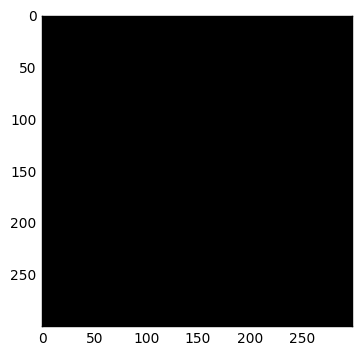

In [55]:
plt.imshow(frame)

In [12]:
vdata = np.array(idata['Mixed_7c'])
vdata.shape

(200, 25, 8, 8, 2048)

In [13]:
np.save('real_inception_Mixed_7c', vdata)

In [18]:
vdata = np.load('real_inception_Mixed_7c.npy')

In [19]:
vdata.shape

(200, 25, 8, 8, 2048)

In [63]:
saved = np.load('reach_inception.npz')
saved7c_ = saved['Mixed_7c']
saved7cstd_ = saved['Mixed_7cstd']

In [20]:
mean5d = np.mean(vdata, axis=0)

In [69]:
np.linalg.norm(saved7c - saved7c_)

475.00223

In [32]:
std5d = np.std(vdata, axis=0)

In [70]:
np.linalg.norm(saved7cstd_ - saved7cstd)

401.24002

In [129]:
np.savez('real_inception_Mixed_7c', mean=mean5d, std=std5d)

In [130]:
def savegif(name, frames):
    with imageio.get_writer(name, mode='I') as writer:
        for f in frames:
            writer.append_data(f)
def disimgs(imgs):
    strs = ''
    for img in imgs:
        strs += '<img src="%s?rand=%f" width="200px"/><br/>'%(img, np.random.rand())
    return HTML(strs)

In [131]:
giffolder='gif/'
# name = '/home/andrewliu/research/viewpoint/data4-30prongpush/MVI_1030.MOV'
name= '/home/andrewliu/research/viewpoint/rllab-real/data/s3/realnew-skip10/realnew_skip10_2017_05_06_18_37_26_0008/gym_log/openaigym.video.0.2351.video012000.mp4'
# name = '/home/andrewliu/research/viewpoint/rllab/data/local/state-mult-real/state_mult_real_2017_04_25_01_19_29_0001/gym_log/openaigym.video.0.11868.video083000.mp4'
vid = imageio.get_reader(name,  'ffmpeg')
nlen = len(vid)
frames = []
for j in range(25):
    frame = scipy.misc.imresize(vid.get_data(j * nlen // 25), idims)
    frames.append(frame)
frames = np.array(frames)
savegif(giffolder+'test.gif', frames)
disimgs([giffolder+'test.gif'])

In [132]:
layersout = sess.run(layers, {image:frames})[0]
layersout.shape

(25, 8, 8, 2048)

In [50]:
layersout2 = layersout

In [27]:
diffs = vdata-vdata[0, i]
diffs.shape

(200, 25, 8, 8, 2048)

In [71]:
plots = []
for i in range(25):
    diffs = vdata-vdata[0, i]
    plots.append(np.mean(diffs**2, axis=(0, 2,3,4)))
    print(i)

KeyboardInterrupt: 

In [133]:
plots = []
for i in range(25):
    diffs = mean5d-layersout[i]
    diffs[std5d < 1e-5]=0
    plots.append(np.mean(diffs**2/(std5d + 1e-9), axis=(1, 2, 3)))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [101]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 25))

In [102]:
diffs.shape

(25, 35, 35, 288)

In [103]:
plots[2]-plots[3]

array([  3.45401466e-02,  -1.33842230e-04,   1.28649175e-02,
        -1.81895137e-01,  -1.84842944e-03,  -1.23551488e-03,
        -1.31040812e-03,  -1.20782852e-03,  -1.38947368e-03,
        -1.25944614e-03,  -1.60551071e-03,  -3.52533460e-02,
        -1.20589137e-03,  -1.45611167e-03,   1.85925961e-02,
         1.07397735e-02,  -1.54808164e-03,  -9.78201628e-04,
         1.09810233e-02,  -8.40395689e-04,  -1.61555111e-02,
        -9.72181559e-04,  -1.05401874e-03,  -2.16504931e-03,
        -1.35529041e-03], dtype=float32)

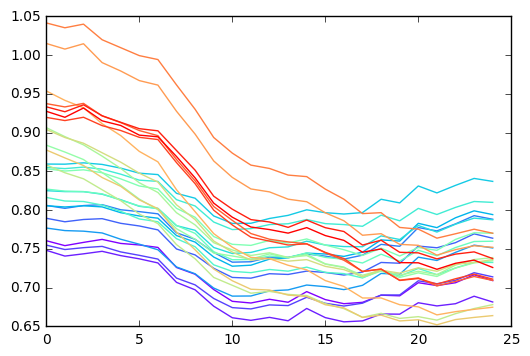

In [134]:
for i in range(25):
#     plt.figure()
    plt.plot(plots[i], c=colors[i])

In [45]:
plots = []
for i in range(25):
    diffs = mean5d-vdata[0, i]
    plots.append(np.mean(np.mean(np.mean(diffs**2, axis=-1), axis=-1), axis=-1))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


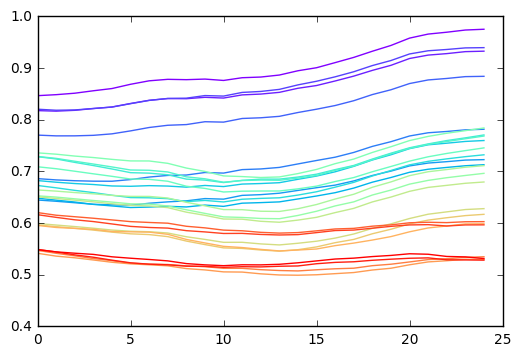

In [46]:
for i in range(25):
#     plt.figure()
    plt.plot(plots[i], c=colors[i])

In [22]:
plots

[0.54632711,
 0.5356741,
 0.54553699,
 0.58647239,
 0.60202253,
 0.57635713,
 0.60431051,
 0.64911926,
 0.61592901,
 0.62593627,
 0.59521621,
 0.59770745,
 0.60092348,
 0.5959295,
 0.60785133,
 0.57929623,
 0.61264747,
 0.5685578,
 0.60854113,
 0.66971457,
 0.68810737,
 0.62250584,
 0.61240399,
 0.61155665,
 0.60445404]

In [1]:
plt.plot(plots[0])

NameError: name 'plt' is not defined

In [21]:
model[1]['Mixed_5b']

<tf.Tensor 'InceptionV3/InceptionV3/Mixed_5b/concat:0' shape=(25, 35, 35, 256) dtype=float32>

In [17]:
mean5d.shape

(83, 35, 35, 288)

In [34]:
np.argsort(logits, axis=1)[:, -4:]

array([[645, 721, 523, 737],
       [645, 523, 737, 721],
       [645, 737, 523, 721],
       [813, 737, 523, 721],
       [813, 737, 721, 523],
       [813, 737, 721, 523],
       [645, 737, 523, 721],
       [645, 523, 737, 721],
       [682, 737, 521, 721],
       [521, 681, 682, 721],
       [517, 681, 737, 721],
       [732, 737, 721, 523],
       [575, 737, 721, 523],
       [523, 853, 737, 721],
       [853, 523, 721, 737],
       [723, 721, 853, 737],
       [732, 721, 544, 737],
       [544, 681, 721, 737],
       [681, 544, 721, 737],
       [523, 721, 544, 737],
       [523, 732, 544, 737],
       [523, 721, 544, 737],
       [681, 544, 721, 737],
       [681, 544, 721, 737],
       [721, 732, 737, 544]])

In [30]:
idata.keys()

['Mixed_6b',
 'Mixed_6c',
 'Mixed_6a',
 'Mixed_7a',
 'Mixed_6d',
 'Mixed_7c',
 'Mixed_7b',
 'Mixed_5d',
 'Mixed_6e']

In [3]:
vdata = np.load('vdata_push_start_goal_vp_distract25020.npy')
vdata.shape

(25, 5020, 48, 48, 3)

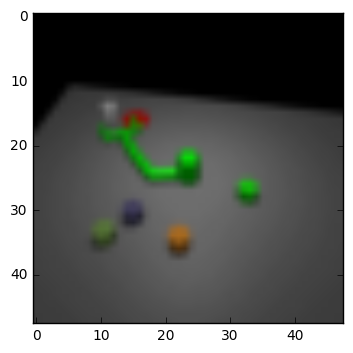

In [4]:
plt.imshow(inverse_transform(vdata[8][4]))

In [5]:
vdata.shape

(25, 5020, 48, 48, 3)

In [6]:
def lrelu(x, leak=0.2, name="lrelu"):
    return tf.maximum(x, leak*x)

def conv2d(input_, output_dim, 
       k_h=5, k_w=5, d_h=2, d_w=2, stddev=0.02,
       name="conv2d"):
    with tf.variable_scope(name):
        w = tf.get_variable('w', [k_h, k_w, input_.get_shape()[-1], output_dim],
                  initializer=tf.truncated_normal_initializer(stddev=stddev))
        conv = tf.nn.conv2d(input_, w, strides=[1, d_h, d_w, 1], padding='SAME')

        biases = tf.get_variable('biases', [output_dim], initializer=tf.constant_initializer(0.0))
        conv = tf.reshape(tf.nn.bias_add(conv, biases), conv.get_shape())

    return conv
class batch_norm(object):
    def __init__(self, epsilon=1e-5, momentum = 0.9, name="batch_norm"):
        with tf.variable_scope(name):
            self.epsilon  = epsilon
            self.momentum = momentum
            self.name = name

    def __call__(self, x):
        return tf.contrib.layers.batch_norm(x,
                      decay=self.momentum, 
                      updates_collections=None,
                      epsilon=self.epsilon,
                      scale=True,
                      is_training=tftrain,
                      scope=self.name)
def linear(input_, output_size, scope=None, stddev=0.02, bias_start=0.0, with_w=False):
    shape = input_.get_shape().as_list()

    with tf.variable_scope(scope or "Linear"):
        matrix = tf.get_variable("Matrix", [shape[1], output_size], tf.float32,
                 tf.random_normal_initializer(stddev=stddev))
        bias = tf.get_variable("bias", [output_size],
              initializer=tf.constant_initializer(bias_start))
    if with_w:
        return tf.matmul(input_, matrix) + bias, matrix, bias
    else:
        return tf.matmul(input_, matrix) + bias
    

def deconv2d(input_, output_shape,
       k_h=5, k_w=5, d_h=2, d_w=2, stddev=0.02,
       name="deconv2d", with_w=False):
    with tf.variable_scope(name):
        # filter : [height, width, output_channels, in_channels]
        w = tf.get_variable('w', [k_h, k_w, output_shape[-1], input_.get_shape()[-1]],
                  initializer=tf.random_normal_initializer(stddev=stddev))

        try:
            deconv = tf.nn.conv2d_transpose(input_, w, output_shape=output_shape,
                    strides=[1, d_h, d_w, 1])

        # Support for verisons of TensorFlow before 0.7.0
        except AttributeError:
            deconv = tf.nn.deconv2d(input_, w, output_shape=output_shape,
                    strides=[1, d_h, d_w, 1])

        biases = tf.get_variable('biases', [output_shape[-1]], initializer=tf.constant_initializer(0.0))
        deconv = tf.reshape(tf.nn.bias_add(deconv, biases), deconv.get_shape())

        if with_w:
            return deconv, w, biases
        else:
            return deconv

In [7]:
class ContextAE:
    def __init__(self, gf_dim=64, df_dim=64,
                 gfc_dim=1024, dfc_dim=1024,
                 c_dim=3):
        self.gf_dim = gf_dim
        self.df_dim = df_dim
        self.c_dim = c_dim

        self.gfc_dim = gfc_dim
        self.dfc_dim = dfc_dim


    def build(self, image):
        imgshape = image.get_shape().as_list()
        print(imgshape)
        self.output_height, self.output_width = imgshape[-3:-1]
        self.batch_size = imgshape[1]
        featsize = 1024
        srcimg = image[0]
        tgtimg = image[2]
        tgtctx = image[1]
        
        with tf.variable_scope("conv_context") as scope:
            tgtctx_h0 = lrelu(conv2d(tgtctx, self.df_dim, name='h0_conv'))
            tgtctx_h1 = lrelu(conv2d(tgtctx_h0, self.df_dim*2, name='h1_conv'))
            tgtctx_h2 = lrelu(conv2d(tgtctx_h1, self.df_dim*4, name='h2_conv'))
            tgtctx_h3 = lrelu(conv2d(tgtctx_h2, self.df_dim*8, name='h3_conv'))
            tgtctx_h4 = lrelu(linear(tf.reshape(tgtctx_h3, [self.batch_size, -1]), featsize, 'h4_lin'))
            tgtctx_z = linear(tgtctx_h4, featsize, 'hz_lin')

        with tf.variable_scope("conv") as scope:
            srcimg_h0 = lrelu(conv2d(srcimg, self.df_dim, name='h0_conv'))
            srcimg_h1 = lrelu(conv2d(srcimg_h0, self.df_dim*2, name='h1_conv'))
            srcimg_h2 = lrelu(conv2d(srcimg_h1, self.df_dim*4, name='h2_conv'))
            srcimg_h3 = lrelu(conv2d(srcimg_h2, self.df_dim*8, name='h3_conv'))
            print(srcimg_h3.get_shape())
            srcimg_h4 = lrelu(linear(tf.reshape(srcimg_h3, [self.batch_size, -1]), featsize, 'h4_lin'))
            srcimg_z = lrelu(linear(srcimg_h4, featsize, 'hz_lin'))
            
            scope.reuse_variables()
            
            tgtimg_h0 = lrelu(conv2d(tgtimg, self.df_dim, name='h0_conv'))
            tgtimg_h1 = lrelu(conv2d(tgtimg_h0, self.df_dim*2, name='h1_conv'))
            tgtimg_h2 = lrelu(conv2d(tgtimg_h1, self.df_dim*4, name='h2_conv'))
            tgtimg_h3 = lrelu(conv2d(tgtimg_h2, self.df_dim*8, name='h3_conv'))
            tgtimg_h4 = lrelu(linear(tf.reshape(tgtimg_h3, [self.batch_size, -1]), featsize, 'h4_lin'))
            tgtimg_z = lrelu(linear(tgtimg_h4, featsize, 'hz_lin'))

        with tf.variable_scope("translate") as scope:
            trans_h0 = lrelu(linear(tf.concat_v2([srcimg_z, tgtctx_z], 1), featsize, 'trans_h0'))
            trans_z = linear(trans_h0, featsize, 'trans_z')
            self.translated_z = trans_z
        
        with tf.variable_scope("deconv") as scope:
            s_h, s_w = self.output_height, self.output_width
            s_h2, s_h4, s_h8, s_h16 = \
                int(s_h/2), int(s_h/4), int(s_h/8), int(s_h/16)
            s_w2, s_w4, s_w8, s_w16 = \
                int(s_w/2), int(s_w/4), int(s_w/8), int(s_w/16)

            output_z_ = lrelu(linear(trans_z, self.gf_dim*8*s_h16*s_w16, 'd_h0_lin'))
            output_h0 = tf.reshape(output_z_, [-1, s_h16, s_w16, self.gf_dim * 8])
            output_h1 = lrelu(deconv2d(tf.concat_v2([output_h0, tgtctx_h3], 3),
                    [self.batch_size, s_h8, s_w8, self.gf_dim*4], name='d_h1'))
            output_h2 = lrelu(deconv2d(tf.concat_v2([output_h1, tgtctx_h2], 3),
                [self.batch_size, s_h4, s_w4, self.gf_dim*2], name='d_h2'))
            output_h3 = lrelu(deconv2d(tf.concat_v2([output_h2, tgtctx_h1], 3),
                [self.batch_size, s_h2, s_w2, self.gf_dim*1], name='d_h3'))
            output_h4 = deconv2d(tf.concat_v2([output_h3, tgtctx_h0], 3),
                [self.batch_size, s_h, s_w, self.c_dim], name='d_h4')
            
            scope.reuse_variables()
            
            truthoutput_z_ = lrelu(linear(tgtimg_z, self.gf_dim*8*s_h16*s_w16, 'd_h0_lin'))
            truthoutput_h0 = tf.reshape(truthoutput_z_, [-1, s_h16, s_w16, self.gf_dim * 8])
            truthoutput_h1 = lrelu(deconv2d(tf.concat_v2([truthoutput_h0, tgtctx_h3], 3),
                    [self.batch_size, s_h8, s_w8, self.gf_dim*4], name='d_h1'))
            truthoutput_h2 = lrelu(deconv2d(tf.concat_v2([truthoutput_h1, tgtctx_h2], 3),
                [self.batch_size, s_h4, s_w4, self.gf_dim*2], name='d_h2'))
            truthoutput_h3 = lrelu(deconv2d(tf.concat_v2([truthoutput_h2, tgtctx_h1], 3),
                [self.batch_size, s_h2, s_w2, self.gf_dim*1], name='d_h3'))
            truthoutput_h4 = deconv2d(tf.concat_v2([truthoutput_h3, tgtctx_h0], 3),
                [self.batch_size, s_h, s_w, self.c_dim], name='d_h4')

        self.simloss = tf.reduce_mean((trans_z - tgtimg_z) ** 2) * 1e3
        mean, var = tf.nn.moments(tgtimg_z, axes=[0])
        print(var.get_shape())
#         self.simloss /= tf.reduce_mean(var)
        print(tgtimg_z.get_shape())
        self.out = output_h4# + contextimg#tf.nn.tanh(h4)
        self.out2 = truthoutput_h4
        self.recon1 = tf.nn.l2_loss(tgtimg - self.out)
        self.recon2 = tf.nn.l2_loss(tgtimg - self.out2)
        self.loss = self.recon1 + self.recon2 + self.simloss

In [8]:
tf.reset_default_graph()
idim = (48, 48)
tftrain = tf.placeholder(tf.bool, name='tftrain')
batch_size=100
tfinput = tf.placeholder(tf.float32, (3, batch_size) + idim + (3, ), name='x')
test = ContextAE()
test.build(tfinput)

[3, 100, 48, 48, 3]
(100, 3, 3, 512)
(1024,)
(100, 1024)


In [9]:
config = tf.ConfigProto(
#     device_count = {'GPU': 0}
                       )
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
learning_rate = tf.placeholder(tf.float32, shape=[])
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(test.loss)
sess.run(tf.global_variables_initializer())
allloss = []
validloss = []
itr = 0
saver = tf.train.Saver()

In [9]:
# new_saver = tf.train.import_meta_graph('viewpoint1000-DSG4239.meta')
# new_saver.restore(sess, 'viewpoint1000-DSG4239')

In [10]:
# saver.restore(sess, './ctxskipstartgoalvpdistract46349')
saver.restore(sess, './ctxskipstartgoalvpdistract53723')

In [21]:
saver.save(sess, 'ctxskipstartgoalvpdistract'+str(itr))

'ctxskipstartgoalvpdistract53723'

In [10]:
np.sum(np.max(np.max(np.max(vdata, axis=-1), axis=-1), axis=-1)==-1)

0

In [11]:
print(vdata.shape)
n = vdata.shape[1]
ntrain = 4500
nvalid = n - ntrain
print(ntrain, nvalid)
validdata = vdata[:, ntrain:]
traindata = vdata[:, :ntrain]
print(validdata.shape, traindata.shape)
while True:
    choicesrc = np.random.choice(ntrain, batch_size)
    choicetgt = np.random.choice(ntrain, batch_size)
    srcdata = traindata[np.arange(0, batch_size) % 25, choicesrc]
    tgtdata = traindata[np.arange(0, batch_size) % 25, choicetgt]
    tgtctx = traindata[0, choicetgt]
    batch = [srcdata, tgtctx, tgtdata]
    
#     print(sess.run( [test.recon1, test.recon2, test.loss, test.simloss], {tfinput: batch, learning_rate:1e-4, tftrain:False}))
    _, loss, sim, r1, r2 = sess.run( [optimizer, test.loss, test.simloss, test.recon1, test.recon2], {tfinput: batch, learning_rate:1e-4, tftrain:False})
    if itr % 4 == 0:
        print(loss, sim, r1, r2)
        allloss.append(loss)
    
    if itr % 40 == 0:
        choicesrc = np.random.choice(nvalid, batch_size)
        choicetgt = np.random.choice(nvalid, batch_size)
        srcdata = validdata[np.arange(0, batch_size) % 25, choicesrc]
        tgtdata = validdata[np.arange(0, batch_size) % 25, choicetgt]
        tgtctx = validdata[0, choicetgt]
        batch = [srcdata, tgtctx, tgtdata]
        loss, sim, r1, r2 = sess.run([test.loss, test.simloss, test.recon1, test.recon2], {tfinput: batch, tftrain:False})
        print(loss, sim, r1, r2,'E')
        validloss.append(loss)
    itr += 1

(25, 5020, 48, 48, 3)
4500 520
(25, 520, 48, 48, 3) (25, 4500, 48, 48, 3)
251.829 3.64609 190.26 57.9229
809.709 4.11354 679.433 126.162 E
224.201 3.63844 162.418 58.1444
241.706 3.67828 180.766 57.2612


KeyboardInterrupt: 

In [14]:
nvalid

520

In [16]:
np.save('odata_valid', validdata)
np.save('odata_train', traindata)

897.065 741.138 151.585


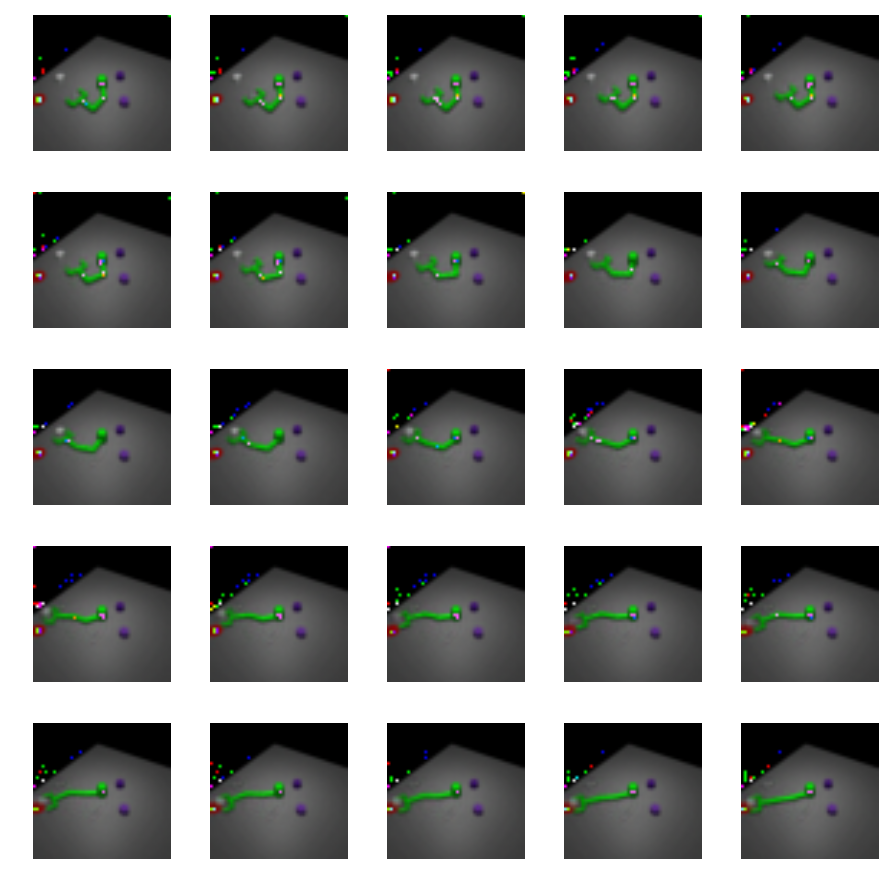

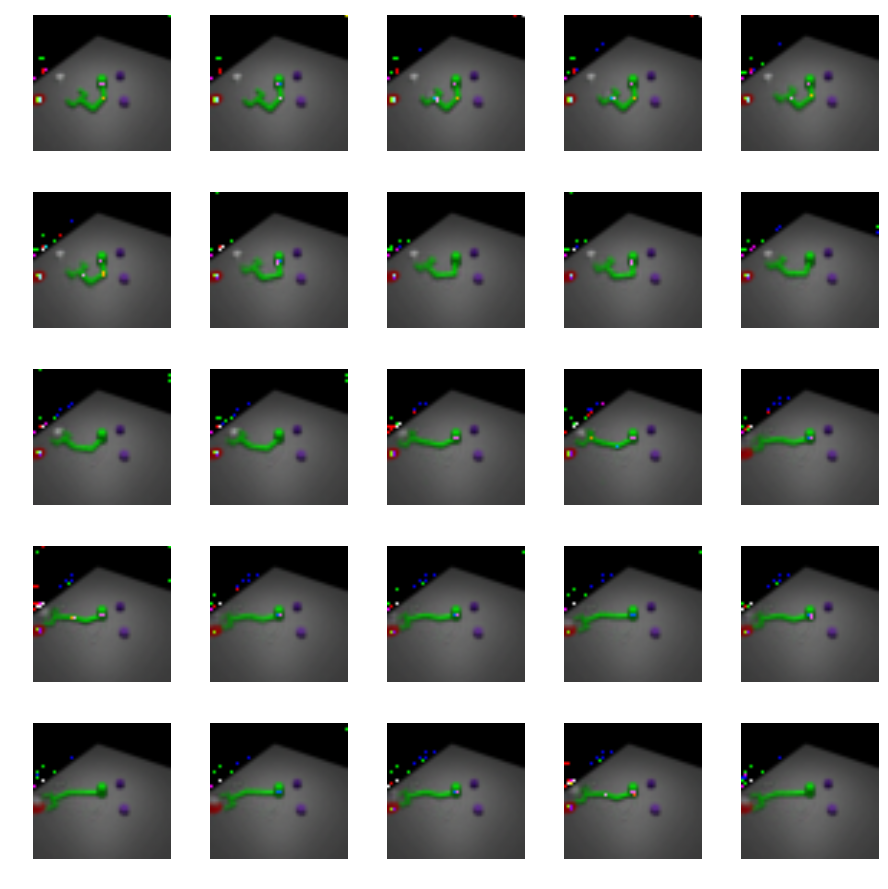

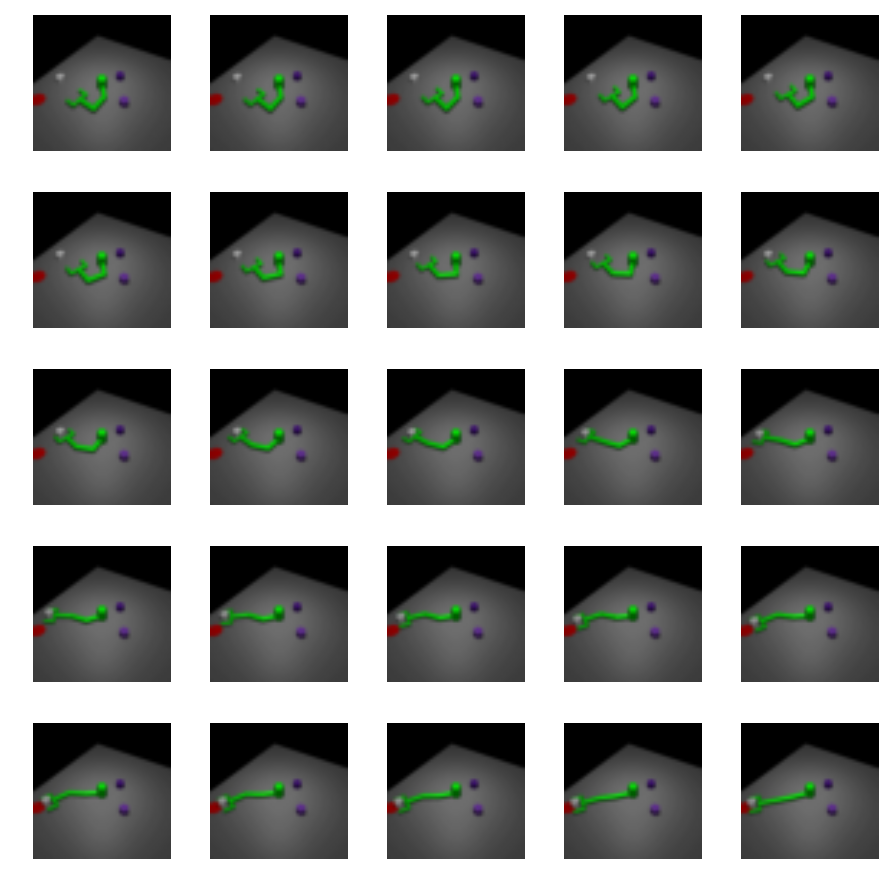

In [12]:
choicesrc = np.random.choice(nvalid, batch_size)
choicetgt = [78] * batch_size
srcdata = validdata[np.arange(0, batch_size) % 25, choicesrc]
tgtdata = validdata[np.arange(0, batch_size) % 25, choicetgt]
tgtctx = validdata[0, choicetgt]
batch = [srcdata, tgtctx, tgtdata]

L, r1, r2, testouts= sess.run([test.loss, test.recon1, test.recon2, test.out], {tfinput: batch, tftrain: False})


L, r1, r2, testouts2= sess.run([test.loss, test.recon1, test.recon2, test.out2], {tfinput: batch, tftrain: False})


print(L, r1, r2)

fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(9,9))
for i in range(25):
    axx = ax[i//5][i%5]
    axx.imshow(inverse_transform(testouts2[i]))
    axx.axis('off')
plt.tight_layout()


fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(9,9))
for i in range(25):
    axx = ax[i//5][i%5]
    axx.imshow(inverse_transform(testouts[i]))
    axx.axis('off')
plt.tight_layout()

fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(9,9))
for i in range(25):
    axx = ax[i//5][i%5]
    axx.imshow(inverse_transform(tgtdata[i]))
    axx.axis('off')
plt.tight_layout()
# for k in range(25):
#     plt.figure()
#     plt.imshow(inverse_transform(tgtdata[k]))
#     plt.figure()
#     plt.imshow(inverse_transform(testouts[k]))

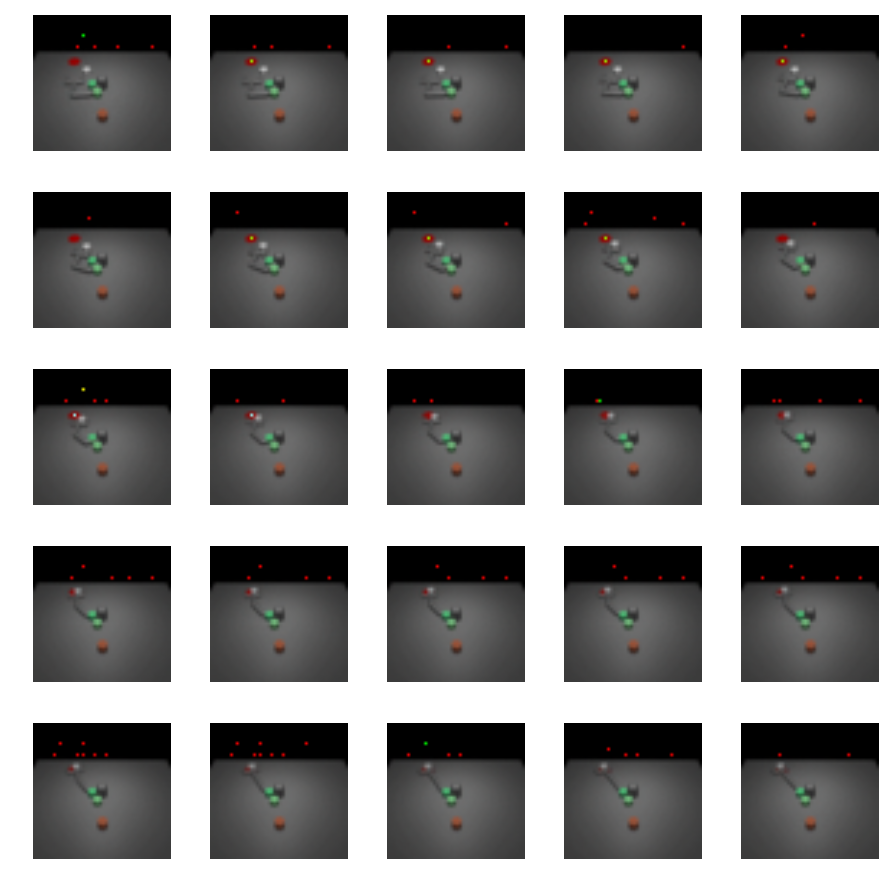

In [92]:
choicesrc = np.random.choice(ntrain, batch_size)
choicetgt = [8] * batch_size
srcdata = traindata[np.arange(0, batch_size) % 25, choicesrc]
tgtdata = traindata[np.arange(0, batch_size) % 25, choicetgt]
tgtctx = traindata[0, choicetgt]
batch = [srcdata, tgtctx, tgtdata]

testouts= sess.run(test.out, {tfinput: batch, tftrain: False})

fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(9,9))
for i in range(25):
    axx = ax[i//5][i%5]
    axx.imshow(inverse_transform(testouts[i]))
    axx.axis('off')
plt.tight_layout()
# for k in range(25):
#     plt.figure()
#     plt.imshow(inverse_transform(tgtdata[k]))
#     plt.figure()
#     plt.imshow(inverse_transform(testouts[k]))

In [78]:
nvalid

4828

In [16]:
feats = []
for i in range(nvalid):
    if i % 100 == 0:
        print(i)
    choicesrc = [i] * batch_size
    choicetgt = [1] * batch_size
    srcdata = validdata[np.arange(0, batch_size) % 25, choicesrc]
    tgtdata = validdata[np.arange(0, batch_size) % 25, choicetgt]
    tgtctx = validdata[0, choicetgt]
    batch = [srcdata, tgtctx, tgtdata]
    feats.append(sess.run( test.translated_z, 
        {tftrain: False, tfinput: batch})[:25])

0
100
200
300
400
500


In [17]:
tffeats = np.array(feats)
tffeats.shape

(520, 25, 1024)

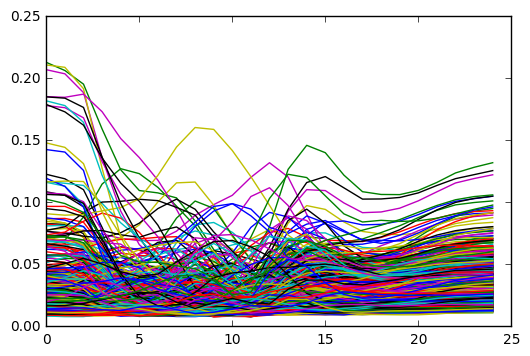

In [18]:
_=plt.plot(np.std(tffeats, axis=0))

In [19]:
means = np.mean(tffeats, axis=0)
means.shape

(25, 1024)

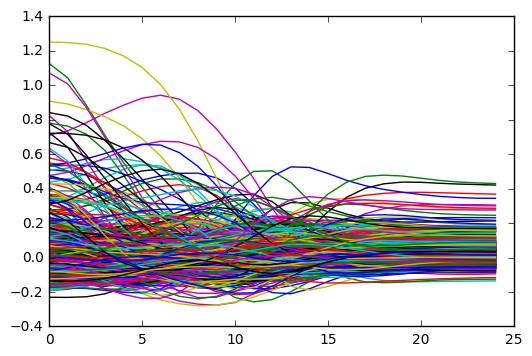

In [20]:
_=plt.plot(means)

In [84]:
np.save('ctxfeatsdistract250', means)

In [36]:
#name= '/home/andrewliu/research/viewpoint/rllab/data/local/trpo-push-res-translate/trpo_push_res_translate_2017_04_04_17_26_15_0001/gym_log/openaigym.video.0.26115.video004000.mp4'
name= '/home/andrewliu/research/viewpoint/rllab/data/local/trpo-push-start-goal-vp-vanilla/trpo_push_start_goal_vp_vanilla_2017_04_08_21_51_29_0001/gym_log/openaigym.video.0.14270.video001000.mp4'
vid = imageio.get_reader(name,  'ffmpeg')
if len(vid) == 51:
    frames = []
    for j in range(1, 51, 2):
        frame = transform(vid.get_data(j))
        if np.max(frame) == -1:
            print("rip", itr, name)
            frames = []
            break
        frames.append(frame)
frames = np.array(frames)

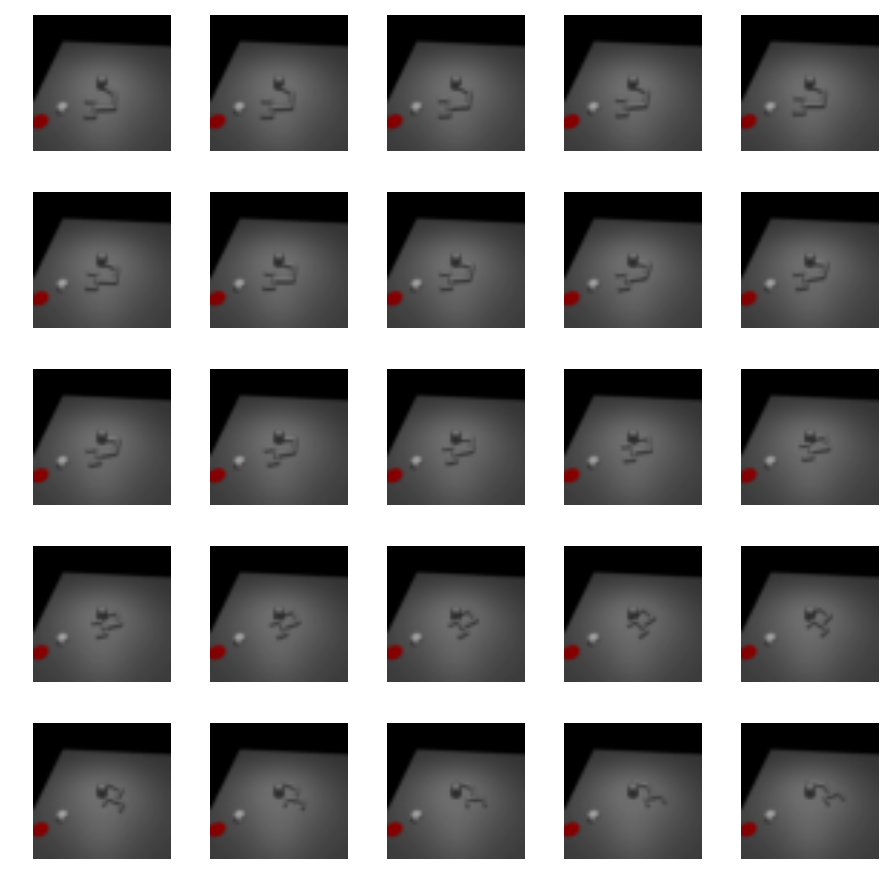

In [37]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(9,9))
for i in range(25):
    axx = ax[i//5][i%5]
    axx.imshow(inverse_transform(frames[i]))
    axx.axis('off')
plt.tight_layout()
# for k in range(25):
#     plt.figure()
#     plt.imshow(inverse_transform(tgtdata[k]))
#     plt.figure()
#     plt.imshow(inverse_transform(testouts[k]))

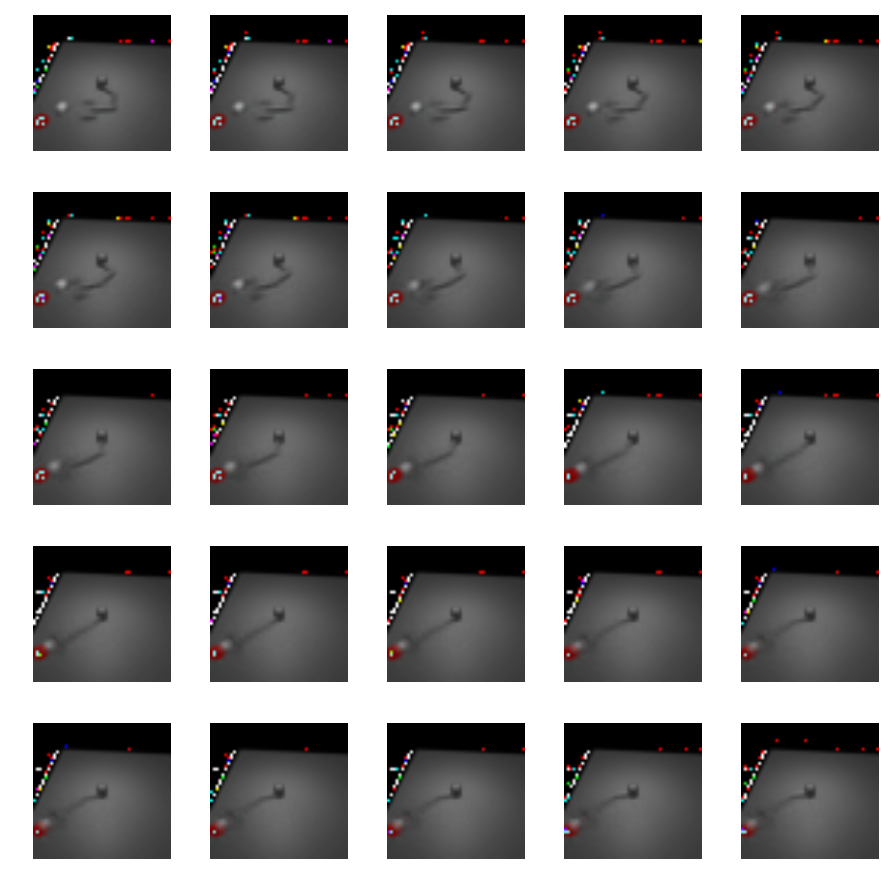

In [39]:
srcdata = frames[np.arange(0, batch_size) % 25]
tgtdata = srcdata
tgtctx = frames[[0] * batch_size]
batch = [srcdata, tgtctx, tgtdata]

testouts= sess.run(test.out, {tfinput: batch, tftrain: False})

fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(9,9))
for i in range(25):
    axx = ax[i//5][i%5]
    axx.imshow(inverse_transform(testouts[i]))
    axx.axis('off')
plt.tight_layout()
# for k in range(25):
#     plt.figure()
#     plt.imshow(inverse_transform(tgtdata[k]))
#     plt.figure()
#     plt.imshow(inverse_transform(testouts[k]))